# ARMA Models - Lab

## Introduction

In this lab, you'll practice your knowledge the Autoregressive (AR), the Moving Average (MA) model, and the combined ARMA model.

## Objectives

You will be able to:
- Understand and explain what a Autoregressive model is
- Understand and explain what a Moving Average model is
- Understand and apply the mathematical formulations for Autoregressive and Moving Average models
- Understand how AR and MA can be combined in ARMA models

## Generate an AR model of the first order with $\phi = 0.7$

In [2]:
#import the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('ggplot')
from jupyterthemes import jtplot
jtplot.style()

Recall that the AR model has the following formula:

$$Y_t = \mu + \phi * Y_{t-1}+\epsilon_t$$

This means that:

$$Y_1 = \mu + \phi * Y_{0}+\epsilon_1$$
$$Y_2 = \mu + \phi * (\text{mean-centered version of } Y_1) +\epsilon_2$$

and so on. 

Assume a mean-zero white noise with a standard deviation of 2. Make sure you have a daily datetime index ranging from January 2017 until the end of March 2018. Assume that $\mu=5$ and $Y_0= 8$.


In [31]:
# keep the random seed
np.random.seed(11225)

# create a series with the specified dates
dates = pd.date_range('2017-01-01', '2018-03-31')
errors = np.random.normal(0, 2, len(dates)-1)
values = [8]

In [32]:
# store the parameters
phi = 0.7
µ = 5

In [33]:
# generate the time series according to the formula
Y = values[-1]

for i, err in enumerate(errors):
    values.append(µ + phi * Y + errors[i])
    Y = values[-1] - µ
    
series = pd.Series(values, index=dates)

Plot the time series and verify what you see

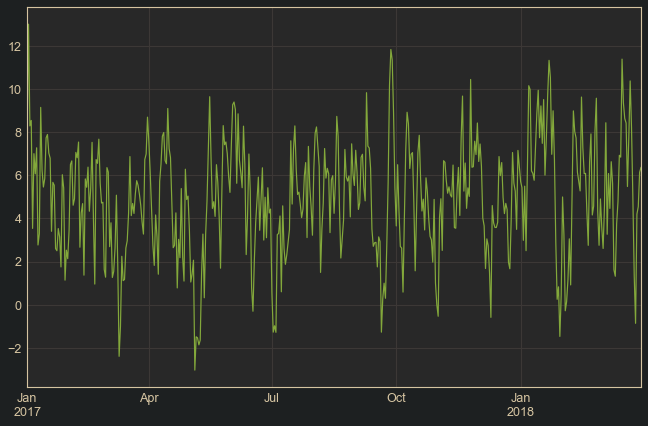

In [34]:
# plot here
series.plot(figsize=(11,7))

## Look at the ACF and PACF of your model and write down your conclusions

We recommend to use `plot_acf` in statsmodels instead of the pandas ACF variant.

In [35]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

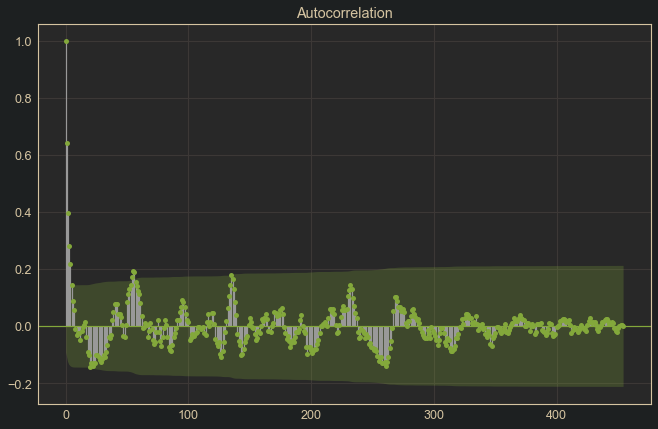

In [37]:
fig, ax = plt.subplots(figsize=(11,7))
acf = plot_acf(series, lags=len(series)-1, ax=ax)

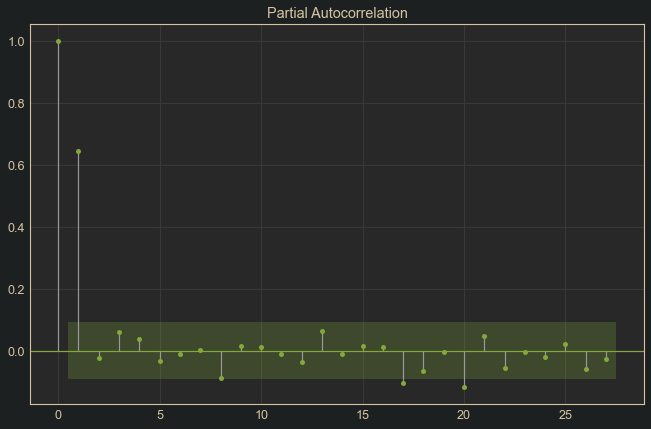

In [38]:
fig, ax = plt.subplots(figsize=(11,7))
pacf = plot_pacf(series, ax=ax)

In [ ]:
# We can see that the ACF tapers off after the 1st lag, whereas the PACF drops to nonsignificant
# level after the first lag, as is expected with a 1st order AR model. The dropoff of partial
# autocorrelation after the first lag would tell us that it came from a 1st order AR model.

## Check your model with ARMA in statsmodels

Statsmodels also has a tool that fits ARMA models on time series. The only thing you have to do is provide the number of orders for AR vs MA. Have a look at the code below, and the output of the code. Make sure that the output for the $\phi$ parameter and $\mu$ is as you'd expect!

In [39]:
# assuming your time series are stored in an object "series"
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

In [40]:
# Fit an MA(1) model to the first simulated data
mod_arma = ARMA(series, order=(1,0))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  455
Model:                     ARMA(1, 0)   Log Likelihood                -968.948
Method:                       css-mle   S.D. of innovations              2.034
Date:                Mon, 27 Jul 2020   AIC                           1943.897
Time:                        23:30:25   BIC                           1956.258
Sample:                    01-01-2017   HQIC                          1948.766
                         - 03-31-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9625      0.266     18.667      0.000       4.441       5.484
ar.L1.y        0.6427      0.036     17.914      0.000       0.572       0.713
                                    Roots           

In [41]:
res_arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  455
Model:                     ARMA(1, 0)   Log Likelihood                -968.948
Method:                       css-mle   S.D. of innovations              2.034
Date:                Mon, 27 Jul 2020   AIC                           1943.897
Time:                        23:31:43   BIC                           1956.258
Sample:                    01-01-2017   HQIC                          1948.766
                         - 03-31-2018                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9625      0.266     18.667      0.000       4.441       5.484
ar.L1.y        0.6427      0.036     17.914      0.000       0.572       0.713
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5560           +0.0000j            1.5560            0.0000
-----------------------------------------------------------------------------
"""

## Generate an MA model of the first order with $\theta = 0.9$

Recall that the MA model has the following formula:

$$Y_t = \mu +\epsilon_t + \theta * \epsilon_{t-1}$$

This means that:

$$Y_1 = \mu + \epsilon_1+  \theta * \epsilon_{0}$$
$$Y_2 = \mu + \epsilon_2+  \theta * \epsilon_{1}$$

and so on. 

Assume a mean-zero white noise with a standard deviation of 4. Make sure you have a daily datetime index is ranging from April 2015 until the end of August 2015. Assume that $\mu=7$.

In [43]:
# keep the random seed
np.random.seed(1234)

# create a series with the specified dates
dates = pd.date_range('2015-04-01', '2015-08-31')

# store the parameters
µ = 7
errors = np.random.normal(0, 4, len(dates))
theta = 0.9
prev_error = errors[0]
values = []

#generate the time series
for err in errors:
    values.append(µ + err + theta*prev_error)
    prev_error = err

ma_series = pd.Series(values, index=dates)

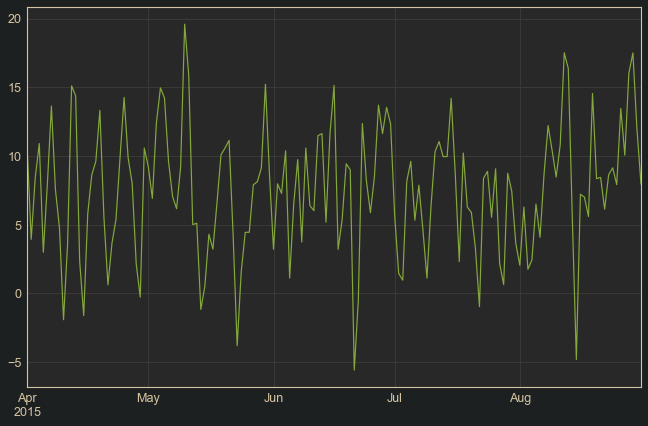

In [44]:
# Plot the time series
ma_series.plot(figsize=(11,7))

## Look at the ACF and PACF of your model and write down your conclusions

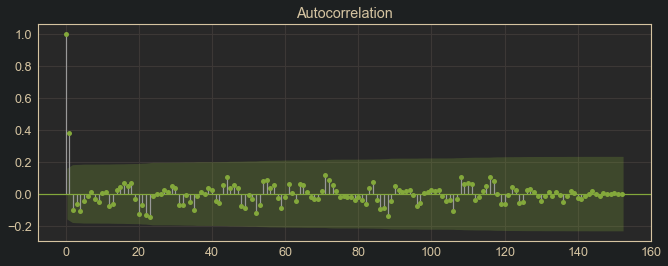

In [45]:
fig, ax = plt.subplots(figsize=(11,4))
acf = plot_acf(ma_series, lags=len(dates)-1, ax=ax)

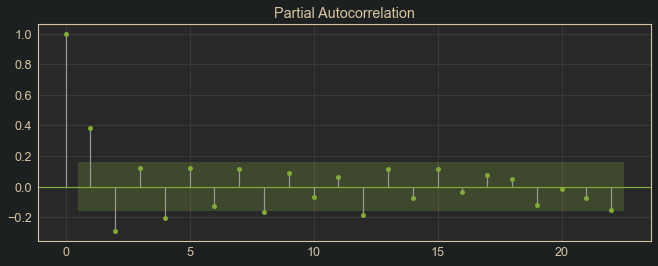

In [46]:
fig, ax = plt.subplots(figsize=(11,4))
pacf = plot_pacf(ma_series, ax=ax)

In [ ]:
# Here we see that the ACF drops to near zero after the first lag, whereas the PACF tapers down
# in magnitude after the first lag. This is to be expected, as the ACF gives the clearest picture
# of the order of an MA model, in this case we used a 1st order MA model to generate the data,
# so the ACF drops to nonsignificant value after the first lag.

## Check your model with ARMA in statsmodels

Repeat what you did for your AR model but now for your MA model to verify the parameters are estimated correctly.

In [48]:
mod_arma = ARMA(ma_series, order=(0,1))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  153
Model:                     ARMA(0, 1)   Log Likelihood                -426.378
Method:                       css-mle   S.D. of innovations              3.909
Date:                Mon, 27 Jul 2020   AIC                            858.757
Time:                        23:45:40   BIC                            867.848
Sample:                    04-01-2015   HQIC                           862.450
                         - 08-31-2015                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.5373      0.590     12.776      0.000       6.381       8.694
ma.L1.y        0.8727      0.051     17.165      0.000       0.773       0.972
                                    Roots           

## Create a model for the 400m data set

Import the data set containing the historical running times for the men's 400m on the Olympic games.

In [68]:
# the data is in "winning_400m.csv"
winning_400m = pd.read_csv('winning_400m.csv')
winning_400m.head()

,year,winning_times
0,1900,49.4
1,1904,49.2
2,1908,50.0
3,1912,48.2
4,1920,49.6


In [69]:
# Checking for missing data
winning_400m.isna().sum()

year             0
winning_times    0
dtype: int64

In [70]:
# Fix date format and set index
winning_400m.year = pd.to_datetime(winning_400m.year, format='%Y')
winning_400m.set_index('year', inplace=True)

In [71]:
winning_400m.index

DatetimeIndex(['1900-01-01', '1904-01-01', '1908-01-01', '1912-01-01',
               '1920-01-01', '1924-01-01', '1928-01-01', '1932-01-01',
               '1936-01-01', '1948-01-01', '1952-01-01', '1956-01-01',
               '1960-01-01', '1964-01-01', '1968-01-01', '1972-01-01',
               '1976-01-01', '1980-01-01', '1984-01-01', '1988-01-01',
               '1992-01-01', '1996-01-01'],
              dtype='datetime64[ns]', name='year', freq=None)

Plot the data

In [81]:
len(winning_400m)

22

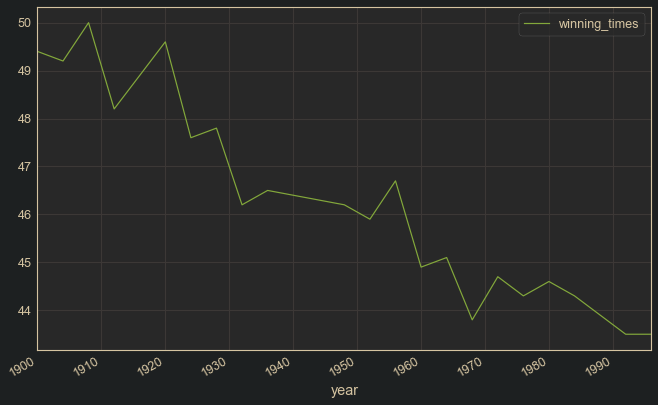

In [72]:
# your code here
winning_400m.plot(figsize=(11,7));

Difference the data to get a stationary time series. Make sure to remove the first NaN value.

In [73]:
# your code here
winning_400m_diff = winning_400m.diff().dropna()

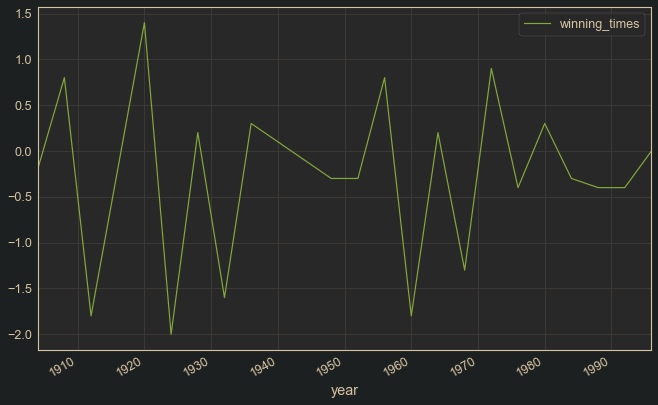

In [74]:
winning_400m_diff.plot(figsize=(11,7))

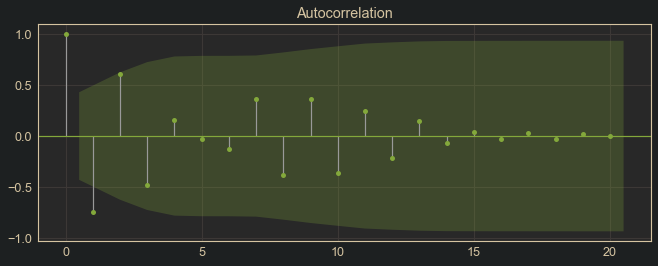

In [76]:
# Look at ACF and PACF
fig, ax = plt.subplots(figsize=(11,4))
acf = plot_acf(winning_400m_diff, lags=len(winning_400m_diff)-1, ax=ax)

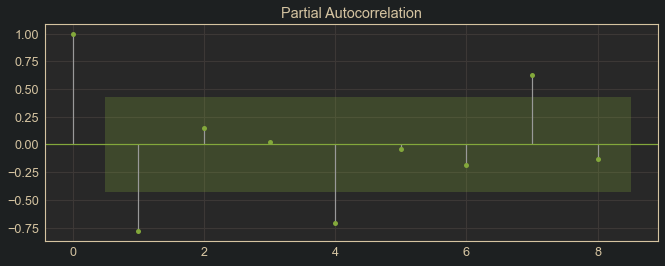

In [82]:
fig, ax = plt.subplots(figsize=(11,4))
pacf = plot_pacf(winning_400m_diff, lags=8, ax=ax)

Based on the ACF and PACF, fit an arma model with the right orders for AR and MA. Feel free to try different models and compare AIC and BIC values, as well as significance values for the parameter estimates.

In [84]:
# your code here
mod_arma = ARMA(winning_400m_diff, order=(1,0))
res_arma = mod_arma.fit()
res_arma.summary()

c:\users\indez\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(1, 0)   Log Likelihood                 -20.054
Method:                       css-mle   S.D. of innovations              0.618
Date:                Tue, 28 Jul 2020   AIC                             46.107
Time:                        00:01:19   BIC                             49.241
Sample:                             0   HQIC                            46.787
                                                                              
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2885      0.080     -3.602      0.000      -0.445      -0.131
ar.L1.winning_times    -0.7186      0.137     -5.262      0.000      -0.986      -0.451
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3916           +0.0000j            1.3916            0.5000
-----------------------------------------------------------------------------
"""

In [85]:
mod_arma = ARMA(winning_400m_diff, order=(1,1))
res_arma = mod_arma.fit()
res_arma.summary()

c:\users\indez\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(1, 1)   Log Likelihood                 -19.958
Method:                       css-mle   S.D. of innovations              0.615
Date:                Tue, 28 Jul 2020   AIC                             47.916
Time:                        00:02:17   BIC                             52.094
Sample:                             0   HQIC                            48.822
                                                                              
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2850      0.086     -3.298      0.001      -0.454      -0.116
ar.L1.winning_times    -0.7708      0.160     -4.826      0.000      -1.084      -0.458
ma.L1.winning_times     0.1172      0.254      0.462      0.644      -0.380       0.614
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2974           +0.0000j            1.2974            0.5000
MA.1           -8.5305           +0.0000j            8.5305            0.5000
-----------------------------------------------------------------------------
"""

In [ ]:
# adding an order of MA did not help AIC or BIC, and produced a non-significant coefficient

In [86]:
mod_arma = ARMA(winning_400m_diff, order=(2,0))
res_arma = mod_arma.fit()
res_arma.summary()

c:\users\indez\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(2, 0)   Log Likelihood                 -19.931
Method:                       css-mle   S.D. of innovations              0.614
Date:                Tue, 28 Jul 2020   AIC                             47.863
Time:                        00:03:00   BIC                             52.041
Sample:                             0   HQIC                            48.770
                                                                              
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2835      0.090     -3.143      0.002      -0.460      -0.107
ar.L1.winning_times    -0.6307      0.223     -2.827      0.005      -1.068      -0.193
ar.L2.winning_times     0.1132      0.228      0.496      0.620      -0.334       0.561
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2878           +0.0000j            1.2878            0.5000
AR.2            6.8570           +0.0000j            6.8570            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
# Adding a second order to the AR did not help the model performance either, and also produced
# a nonsignificant coefficient for the second order.

## What is your final model? Why did you pick this model?

In [ ]:
# I chose a AR(1) model, since it had the best AIC and BIC. The PACF indicated that this might
# be the correct model to choose, since there was a dropoff after the first lag, however, some
# other significant lag correlations were a bit confusing.

## Summary

Great! Now that you know the ins and outs of ARMA models and you've practiced your modeling knowledge.